In [5]:
import json

import matplotlib.pyplot as plt
import numpy as np

import fig_settings as fs

In [6]:
colors = ["#5f6366", "#3768d2", "#005b7a", "#a6cebd"]
fs.set_fonts()

start_trace = 0
end_trace = 1000
start_3d = 0
end_3d = 10000

# Time Series Plotting

Intended to visualize the reservoir's capturing of the system's climate. Also visualizes the forecast horizon.

In [7]:
with open("Data/timeseries_traces.json") as file:
    jsondata = json.loads(file.read())
    t = np.array(jsondata["t"], dtype=float)

    # true signal
    x_signal = np.array(jsondata["signal-x"], dtype=float)
    y_signal = np.array(jsondata["signal-y"], dtype=float)
    z_signal = np.array(jsondata["signal-z"], dtype=float)

    # OECT prediction
    x_OECT = np.array(jsondata["OECT-prediction-x"], dtype=float)
    y_OECT = np.array(jsondata["OECT-prediction-y"], dtype=float)
    z_OECT = np.array(jsondata["OECT-prediction-z"], dtype=float)

    # tanh prediction
    x_tanh = np.array(jsondata["tanh-prediction-x"], dtype=float)
    y_tanh = np.array(jsondata["tanh-prediction-y"], dtype=float)
    z_tanh = np.array(jsondata["tanh-prediction-z"], dtype=float)

#### Fig. 3: 3D visualization

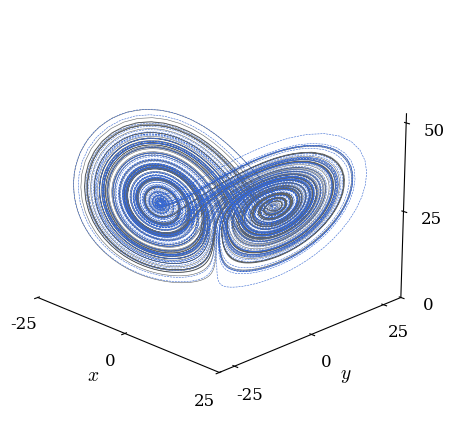

In [8]:
idx1 = 0
idx2 = 1

fig, ax = plt.subplots(1, 1, figsize=(5.5, 4.5), subplot_kw=dict(projection="3d"))

ax.plot3D(
    x_signal[start_3d:end_3d],
    y_signal[start_3d:end_3d],
    z_signal[start_3d:end_3d],
    "-",
    color=colors[idx1],
    lw=0.4,
)
ax.plot3D(
    x_OECT[start_3d:end_3d],
    y_OECT[start_3d:end_3d],
    z_OECT[start_3d:end_3d],
    "--",
    color=colors[idx2],
    lw=0.4,
)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# make the grid lines transparent
ax.xaxis._axinfo["grid"]["color"] = (1, 1, 1, 0)
ax.yaxis._axinfo["grid"]["color"] = (1, 1, 1, 0)
ax.zaxis._axinfo["grid"]["color"] = (1, 1, 1, 0)

ax.set_xticks([-25, 0, 25], [-25, 0, 25])
ax.set_yticks([-25, 0, 25], [-25, 0, 25])
ax.set_zticks([0, 25, 50], [0, 25, 50])
# reduce whitespace around 3d plot
ax.view_init(20, -45)
ax.dist = 5

plt.subplots_adjust(left=0, right=0.9, top=1, bottom=0.1)

plt.savefig("Figures/fig3.png", dpi=1000)
plt.savefig("Figures/fig3.pdf", dpi=1000)
plt.show()

#### Fig. 4: traces of each dimension of the Lorenz attractor

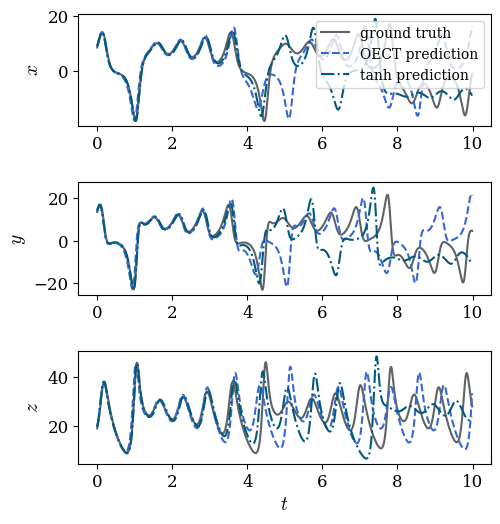

In [9]:
plt.figure(figsize=(5.5, 6))

idx1 = 0
idx2 = 1
idx3 = 2

# reduce space between plots
plt.subplots_adjust(hspace=0.5)

# x
plt.subplot(3, 1, 1)
plt.ylabel(r"$x$")
plt.plot(
    t[start_trace:end_trace],
    x_signal[start_trace:end_trace],
    "-",
    color=colors[idx1],
    label="ground truth",
)
plt.plot(
    t[start_trace:end_trace],
    x_OECT[start_trace:end_trace],
    "--",
    color=colors[idx2],
    label="OECT prediction",
)
plt.plot(
    t[start_trace:end_trace],
    x_tanh[start_trace:end_trace],
    "-.",
    color=colors[idx3],
    label="tanh prediction",
)

plt.legend(loc="upper right")

# y
plt.subplot(3, 1, 2)
plt.ylabel(r"$y$")
plt.plot(
    t[start_trace:end_trace],
    y_signal[start_trace:end_trace],
    "-",
    color=colors[idx1],
    label="ground truth",
)
plt.plot(
    t[start_trace:end_trace],
    y_OECT[start_trace:end_trace],
    "--",
    color=colors[idx2],
    label="OECT prediction",
)
plt.plot(
    t[start_trace:end_trace],
    y_tanh[start_trace:end_trace],
    "-.",
    color=colors[idx3],
    label="tanh prediction",
)

# z
plt.subplot(3, 1, 3)
plt.ylabel(r"$z$")
plt.plot(
    t[start_trace:end_trace],
    z_signal[start_trace:end_trace],
    "-",
    color=colors[idx1],
    label="Ground truth",
)
plt.plot(
    t[start_trace:end_trace],
    z_OECT[start_trace:end_trace],
    "--",
    color=colors[idx2],
    label="OECT prediction",
)
plt.plot(
    t[start_trace:end_trace],
    z_tanh[start_trace:end_trace],
    "-.",
    color=colors[idx3],
    label="tanh prediction",
)

plt.xlabel(r"$t$")

plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.15)

plt.savefig("Figures/fig4.png", dpi=1000)
plt.savefig("Figures/fig4.pdf", dpi=1000)
plt.show()